## *Author*: Immanuella Duke
## *Dataset*: Incident management process enriched event log 
### *Category*: *Business problem*
### *Project Description*: This project uses predictive attributes of different 
### incidents to predict the amount of time it takes to resolve an incident

## Import libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Import Data

In [15]:
incident_log_df = pd.read_csv("C://Users//Immanuella Duke//OneDrive - Ashesi University//Documents//My Data Science Projects//Azure_ML_explore//incident_mngt//data//incident_event_log.csv")

#a portion of the data frame
incident_log_df.head()

#all the attributes present in this dataset
print(incident_log_df.columns)

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')


In [19]:
incident_log_df.tail(10)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
141702,INC0120495,Awaiting User Info,True,1,0,4,True,Caller 323,Opened by 14,15/2/2017 11:58,...,False,Do Not Notify,?,?,?,?,?,?,?,16/2/2017 09:51
141703,INC0120495,Closed,False,1,0,5,True,Caller 323,Opened by 14,15/2/2017 11:58,...,False,Do Not Notify,?,?,?,?,?,?,?,16/2/2017 09:51
141704,INC0120835,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 09:09,...,False,Do Not Notify,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141705,INC0120835,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 09:09,...,False,Do Not Notify,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141706,INC0120835,Resolved,True,1,0,3,True,Caller 116,Opened by 12,16/2/2017 09:09,...,True,Do Not Notify,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,...,True,Do Not Notify,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,...,True,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141711,INC0121064,Closed,False,1,0,3,True,Caller 116,Opened by 12,16/2/2017 14:17,...,True,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


Text(0.5, 1.0, 'Closed code histogram')

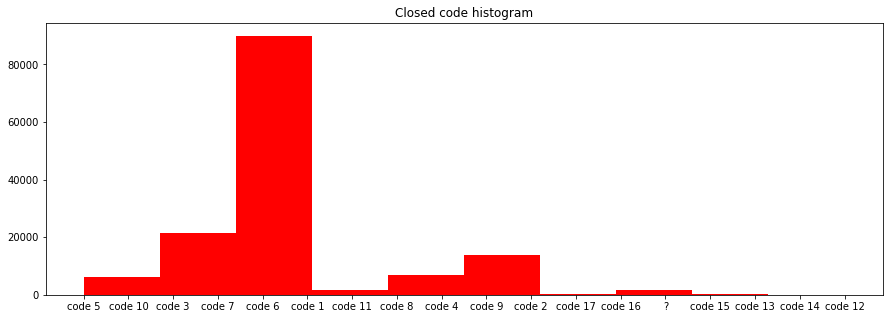

In [17]:
plt.figure(figsize=[15,5])

plt.hist(incident_log_df.closed_code, color='red')
plt.title("Closed code histogram")
# code6 is the most frequent code

Text(0.5, 1.0, 'Histogram of different incident states')

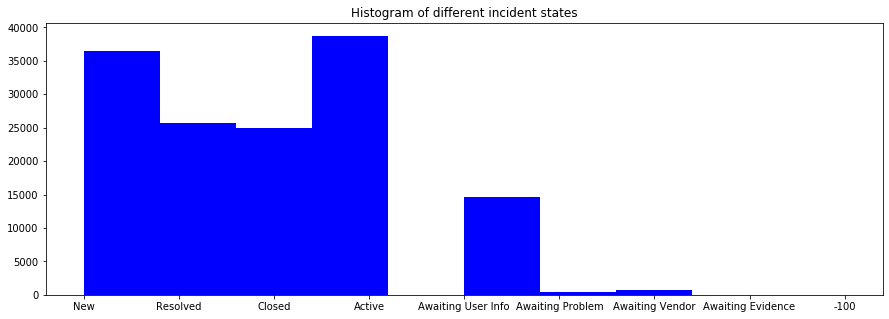

In [18]:
plt.figure(figsize=[15,5])

plt.hist(incident_log_df.incident_state, color='blue')
plt.title("Histogram of different incident states")

#### incident_log_df.info() - no null or na in this dataset


In [35]:
incident_log_df.u_symptom

0          Symptom 72
1          Symptom 72
2          Symptom 72
3          Symptom 72
4         Symptom 471
             ...     
141707    Symptom 494
141708    Symptom 494
141709    Symptom 494
141710    Symptom 494
141711    Symptom 494
Name: u_symptom, Length: 141712, dtype: object

(array([103926.,   8553.,   3439.,   8553.,   4827.,   7674.,   2527.,
          1167.,    689.,    357.]),
 array([  0. ,  52.5, 105. , 157.5, 210. , 262.5, 315. , 367.5, 420. ,
        472.5, 525. ]),
 <a list of 10 Patch objects>)

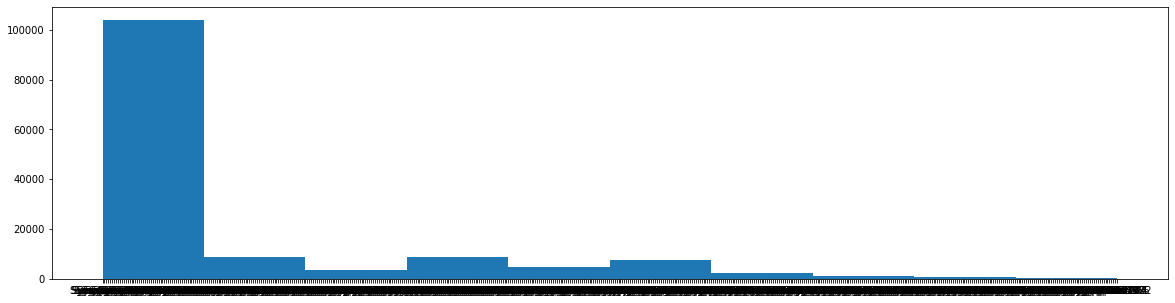

In [34]:

plt.figure(figsize=[20,5])
plt.hist(incident_log_df.u_symptom)

Text(0.5, 1.0, 'level of urgency for the incidents')

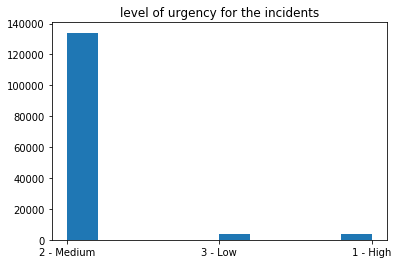

In [30]:
plt.hist(incident_log_df.urgency)
plt.title("level of urgency for the incidents") #most of the incidents are of medium urgency


Text(0.5, 1.0, 'level of impact for the incidents')

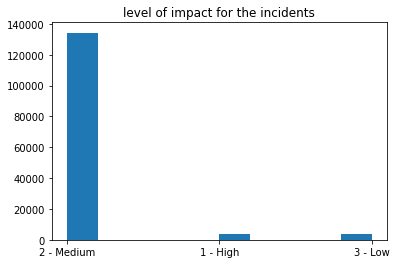

In [29]:
plt.hist(incident_log_df.impact)
plt.title("level of impact for the incidents") #most of the incidents are of medium impact

(array([1.40462e+05, 0.00000e+00, 2.20000e+02, 0.00000e+00, 0.00000e+00,
        9.95000e+02, 0.00000e+00, 1.70000e+01, 0.00000e+00, 1.80000e+01]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

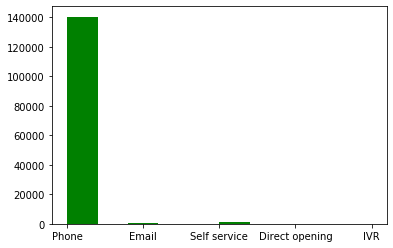

In [26]:
plt.hist(incident_log_df.contact_type, color = "green") # phone is the primary mode of reporting issues

In [24]:
incident_log_df.groupby([incident_log_df.number]).sum().tail()

,active,reassignment_count,reopen_count,sys_mod_count,made_sla,knowledge,u_priority_confirmation
number,,,,,,,
INC0120304,2.0,0,0,3,3.0,0.0,2.0
INC0120319,1.0,0,0,1,2.0,0.0,0.0
INC0120495,5.0,4,0,15,6.0,0.0,0.0
INC0120835,3.0,3,0,8,4.0,0.0,2.0
INC0121064,3.0,3,0,6,4.0,0.0,2.0


#### Data description: 

## Feature Engineering

## Train Model

## Make Preditions

## Evaluate Model

## Report Key findings